In [2]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/sample_data/dataset_arredondado_unidades.csv', sep=';')
df

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
0,05_12_2022_09_05_31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
1,05_12_2022_09_21_59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2,05_12_2022_09_27_23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
3,05_12_2022_09_32_47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
4,05_12_2022_09_38_11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,08_02_2023_14_06_06,44.0,86.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,49.0,93.0,37.0,64.0,96.0,95.0,95.0
9458,08_02_2023_14_11_06,44.0,85.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,41.0,93.0,37.0,64.0,96.0,95.0,95.0
9459,08_02_2023_14_16_06,44.0,85.0,90.0,28.0,21.0,85.0,92.0,89.0,94.0,95.0,92.0,42.0,93.0,37.0,64.0,96.0,95.0,95.0
9460,08_02_2023_14_21_06,44.0,86.0,90.0,28.0,22.0,85.0,92.0,89.0,94.0,95.0,92.0,36.0,93.0,37.0,64.0,96.0,95.0,95.0


In [4]:
df.index = pd.to_datetime(df['Time'], format='%d_%m_%Y_%H_%M_%S')
df[:26]

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,,,,,,,
2022-12-05 09:05:31,05_12_2022_09_05_31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,05_12_2022_09_21_59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,05_12_2022_09_27_23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,05_12_2022_09_32_47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,05_12_2022_09_38_11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
2022-12-05 10:57:17,05_12_2022_10_57_17,88.0,66.0,61.0,79.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0
2022-12-05 11:02:41,05_12_2022_11_02_41,89.0,66.0,61.0,79.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0
2022-12-05 11:08:05,05_12_2022_11_08_05,89.0,66.0,61.0,77.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,1.0,67.0,97.0,77.0,94.0,100.0,100.0
2022-12-05 11:13:29,05_12_2022_11_13_29,88.0,62.0,61.0,76.0,0.0,39.0,40.0,0.0,74.0,18.0,98.0,0.0,68.0,98.0,77.0,94.0,100.0,100.0


In [5]:
column_to_remove = ['Time']
df = df.drop(column_to_remove, axis=1) #Remover a coluna date time já que esta se encontra indexada
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,,,,,,
2022-12-05 09:05:31,94.0,64.0,64.0,74.0,0.0,0.0,36.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,90.0,65.0,65.0,71.0,0.0,21.0,38.0,0.0,46.0,0.0,13.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,89.0,64.0,64.0,71.0,0.0,21.0,38.0,0.0,44.0,0.0,13.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 14:06:06,44.0,86.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,49.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:11:06,44.0,85.0,90.0,28.0,16.0,85.0,92.0,89.0,94.0,95.0,92.0,41.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:16:06,44.0,85.0,90.0,28.0,21.0,85.0,92.0,89.0,94.0,95.0,92.0,42.0,93.0,37.0,64.0,96.0,95.0,95.0


In [6]:
level_F1 = df['F1']
level_F1 = pd.concat([ level_F1, df['F2']], axis=1)
level_F1 = pd.concat([ level_F1, df['F3']], axis=1)
level_F1 = pd.concat([ level_F1, df['F6']], axis=1)
level_F1 = pd.concat([ level_F1, df['F8']], axis=1)
level_F1 = pd.concat([ level_F1, df['F9']], axis=1)
level_F1 = pd.concat([ level_F1, df['F10']], axis=1)
level_F1 = pd.concat([ level_F1, df['F13']], axis=1)
level_F1 = pd.concat([ level_F1, df['F14']], axis=1)
level_F1 = pd.concat([ level_F1, df['F15']], axis=1)
level_F1 = pd.concat([ level_F1, df['F16']], axis=1)
level_F1 = pd.concat([ level_F1, df['F17']], axis=1)
level_F1 = pd.concat([ level_F1, df['F18']], axis=1)
level_F1

,F1,F2,F3,F6,F8,F9,F10,F13,F14,F15,F16,F17,F18
Time,,,,,,,,,,,,,
2022-12-05 09:05:31,94.0,64.0,64.0,0.0,0.0,50.0,0.0,0.0,0.0,77.0,100.0,100.0,100.0
2022-12-05 09:21:59,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:27:23,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:32:47,90.0,65.0,65.0,21.0,0.0,46.0,0.0,0.0,0.0,76.0,100.0,100.0,100.0
2022-12-05 09:38:11,89.0,64.0,64.0,21.0,0.0,44.0,0.0,0.0,1.0,76.0,100.0,100.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-08 14:06:06,44.0,86.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:11:06,44.0,85.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0
2023-02-08 14:16:06,44.0,85.0,90.0,85.0,89.0,94.0,95.0,93.0,37.0,64.0,96.0,95.0,95.0


In [7]:
def df_to_X_y(df, window_size=14):
  df_as_np = df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
X, y = df_to_X_y(level_F1)
X.shape, y.shape

((9448, 14, 13), (9448, 13))

In [9]:
train_size = int(0.7 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size + int((X.shape[0]-train_size)/2)], y[train_size:train_size + int(int((X.shape[0]-train_size)/2))]
X_test, y_test = X[train_size + int((X.shape[0]-train_size)/2):], y[train_size + int((X.shape[0]-train_size)/2):]

X_train.shape, y_train.shape, X_val.shape, y_val.shape,X_test.shape, y_test.shape

((6613, 14, 13),
 (6613, 13),
 (1417, 14, 13),
 (1417, 13),
 (1418, 14, 13),
 (1418, 13))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((14,13)))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(32,'relu'))
model.add(Dense(13,'linear'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               276480    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 32)                8224      
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                                 
Total params: 285,133
Trainable params: 285,133
Non-trainable params: 0
_________________________________________________________________


In [11]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [12]:
model.fit(X_train,y_train, batch_size =32, validation_data=(X_val,y_val),epochs=15,callbacks=[cp1])

Epoch 1/15
206/207 [============================>.] - ETA: 0s - loss: 2042.5680 - root_mean_squared_error: 45.1948

207/207 [==============================] - 21s 88ms/step - loss: 2038.3660 - root_mean_squared_error: 45.1483 - val_loss: 792.7960 - val_root_mean_squared_error: 28.1566
Epoch 2/15
207/207 [==============================] - ETA: 0s - loss: 614.6318 - root_mean_squared_error: 24.7918

207/207 [==============================] - 16s 78ms/step - loss: 614.6318 - root_mean_squared_error: 24.7918 - val_loss: 569.3629 - val_root_mean_squared_error: 23.8613
Epoch 3/15
207/207 [==============================] - ETA: 0s - loss: 404.7006 - root_mean_squared_error: 20.1172

207/207 [==============================] - 16s 79ms/step - loss: 404.7006 - root_mean_squared_error: 20.1172 - val_loss: 423.5145 - val_root_mean_squared_error: 20.5795
Epoch 4/15
206/207 [============================>.] - ETA: 0s - loss: 273.9872 - root_mean_squared_error: 16.5526

207/207 [==============================] - 17s 84ms/step - loss: 273.8054 - root_mean_squared_error: 16.5471 - val_loss: 312.5755 - val_root_mean_squared_error: 17.6798
Epoch 5/15
206/207 [============================>.] - ETA: 0s - loss: 193.0254 - root_mean_squared_error: 13.8934

207/207 [==============================] - 16s 79ms/step - loss: 193.0027 - root_mean_squared_error: 13.8925 - val_loss: 230.2705 - val_root_mean_squared_error: 15.1747
Epoch 6/15
207/207 [==============================] - ETA: 0s - loss: 135.4581 - root_mean_squared_error: 11.6386

207/207 [==============================] - 16s 78ms/step - loss: 135.4581 - root_mean_squared_error: 11.6386 - val_loss: 170.2161 - val_root_mean_squared_error: 13.0467
Epoch 7/15
207/207 [==============================] - ETA: 0s - loss: 104.2279 - root_mean_squared_error: 10.2092

207/207 [==============================] - 17s 83ms/step - loss: 104.2279 - root_mean_squared_error: 10.2092 - val_loss: 139.9673 - val_root_mean_squared_error: 11.8308
Epoch 8/15
206/207 [============================>.] - ETA: 0s - loss: 89.8535 - root_mean_squared_error: 9.4791

207/207 [==============================] - 17s 81ms/step - loss: 89.8758 - root_mean_squared_error: 9.4803 - val_loss: 118.3291 - val_root_mean_squared_error: 10.8779
Epoch 9/15
206/207 [============================>.] - ETA: 0s - loss: 82.7191 - root_mean_squared_error: 9.0950

207/207 [==============================] - 16s 79ms/step - loss: 82.6757 - root_mean_squared_error: 9.0926 - val_loss: 107.9556 - val_root_mean_squared_error: 10.3902
Epoch 10/15
207/207 [==============================] - ETA: 0s - loss: 78.6220 - root_mean_squared_error: 8.8669

207/207 [==============================] - 18s 87ms/step - loss: 78.6220 - root_mean_squared_error: 8.8669 - val_loss: 99.7787 - val_root_mean_squared_error: 9.9889
Epoch 11/15
206/207 [============================>.] - ETA: 0s - loss: 74.9250 - root_mean_squared_error: 8.6559

207/207 [==============================] - 17s 81ms/step - loss: 74.9011 - root_mean_squared_error: 8.6545 - val_loss: 90.5561 - val_root_mean_squared_error: 9.5161
Epoch 12/15
207/207 [==============================] - 11s 53ms/step - loss: 72.3497 - root_mean_squared_error: 8.5059 - val_loss: 91.9148 - val_root_mean_squared_error: 9.5872
Epoch 13/15
207/207 [==============================] - ETA: 0s - loss: 71.0011 - root_mean_squared_error: 8.4262

207/207 [==============================] - 16s 80ms/step - loss: 71.0011 - root_mean_squared_error: 8.4262 - val_loss: 82.6810 - val_root_mean_squared_error: 9.0929
Epoch 14/15
207/207 [==============================] - ETA: 0s - loss: 68.1744 - root_mean_squared_error: 8.2568

207/207 [==============================] - 17s 82ms/step - loss: 68.1744 - root_mean_squared_error: 8.2568 - val_loss: 76.9517 - val_root_mean_squared_error: 8.7722
Epoch 15/15
206/207 [============================>.] - ETA: 0s - loss: 65.9614 - root_mean_squared_error: 8.1217

207/207 [==============================] - 18s 85ms/step - loss: 65.8923 - root_mean_squared_error: 8.1174 - val_loss: 73.6875 - val_root_mean_squared_error: 8.5841


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

def smape_adjusted(a, f):
    return (1/a.size * np.sum(np.abs(f-a) / (np.abs(a) + np.abs(f))*100))

def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f1_preds = predictions[:, 0]
  f1_actuals = y[:, 0]

  f1_preds = np.nan_to_num(f1_preds, nan=0.0)

  df = pd.DataFrame(data={'F1 Predictions': f1_preds,
                          'F1 Actuals':f1_actuals,
                          })
  plt.plot(df['F1 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F1 Actuals'][start:end], label= 'Valores reais')
  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  mape_value = mape(df['F1 Actuals'], df['F1 Predictions'])
  smape_value = smape_adjusted(df['F1 Actuals'], df['F1 Predictions'])
  rmse_value = rmse(df['F1 Actuals'], df['F1 Predictions'])
  mae_value = mae(df['F1 Actuals'], df['F1 Predictions'])

  print("MAE:", mae_value)

  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  return df[start:end]

#train_predictions = model.predict(X_test).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
#train_results

def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f2_preds = predictions[:, 1]
  f2_actuals =  y[:, 1]


  f2_preds = np.nan_to_num(f2_preds, nan=0.0)

  df = pd.DataFrame(data={'F2 Predictions': f2_preds,
                          'F2 Actuals': f2_actuals
                          })
  plt.plot(df['F2 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F2 Actuals'][start:end], label = 'Valores reais')
  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')
  #recall = recall_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')
  #f1 = f1_score(np.round(f2_actuals), np.round(f2_preds), average='weighted')

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  mape_value = mape(df['F2 Actuals'], df['F2 Predictions'])
  smape_value = smape_adjusted(df['F2 Actuals'], df['F2 Predictions'])
  rmse_value = rmse(df['F2 Actuals'], df['F2 Predictions'])
  mae_value = mae(df['F2 Actuals'], df['F2 Predictions'])

  print("MAE:", mae_value)

  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)
  return df[start:end]

def plot_predictions3(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f3_preds = predictions[:, 2]
  f3_actuals =  y[:, 2]

  f3_preds = np.nan_to_num(f3_preds, nan=0.0)

  df = pd.DataFrame(data={'F3 Predictions': f3_preds,
                          'F3 Actuals': f3_actuals
                          })
  plt.plot(df['F3 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F3 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  #recall = recall_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  #f1 = f1_score(np.round(f3_actuals), np.round(f3_preds), average='weighted')
  mape_value = mape(df['F3 Actuals'], df['F3 Predictions'])
  smape_value = smape_adjusted(df['F3 Actuals'], df['F3 Predictions'])
  rmse_value = rmse(df['F3 Actuals'], df['F3 Predictions'])
  mae_value = mae(df['F3 Actuals'], df['F3 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)
  print("SMAPE", smape_value)
  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions4(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f6_preds = predictions[:, 3]
  f6_actuals =  y[:, 3]

  f6_preds = np.nan_to_num(f6_preds, nan=0.0)

  df = pd.DataFrame(data={'F6 Predictions': f6_preds,
                          'F6 Actuals': f6_actuals
                          })
  plt.plot(df['F6 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F6 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')
  #recall = recall_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')
  #f1 = f1_score(np.round(f6_actuals), np.round(f6_preds), average='weighted')

  mape_value = mape(df['F6 Actuals'], df['F6 Predictions'])
  smape_value = smape_adjusted(df['F6 Actuals'], df['F6 Predictions'])
  rmse_value = rmse(df['F6 Actuals'], df['F6 Predictions'])
  mae_value = mae(df['F6 Actuals'], df['F6 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)

  return df[start:end]

def plot_predictions5(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f8_preds = predictions[:, 4]
  f8_actuals =  y[:, 4]

  f8_preds = np.nan_to_num(f8_preds, nan=0.0)

  df = pd.DataFrame(data={'F8 Predictions': f8_preds,
                          'F8 Actuals': f8_actuals
                          })
  plt.plot(df['F8 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F8 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()
  #precision = precision_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  #recall = recall_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  #f1 = f1_score(np.round(f8_actuals), np.round(f8_preds), average='weighted')
  mape_value = mape(df['F8 Actuals'], df['F8 Predictions'])
  smape_value = smape_adjusted(df['F8 Actuals'], df['F8 Predictions'])
  rmse_value = rmse(df['F8 Actuals'], df['F8 Predictions'])
  mae_value = mae(df['F8 Actuals'], df['F8 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions6(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f9_preds = predictions[:, 5]
  f9_actuals =  y[:, 5]

  f9_preds = np.nan_to_num(f9_preds, nan=0.1)

  df = pd.DataFrame(data={'F9 Predictions': f9_preds,
                          'F9 Actuals': f9_actuals
                          })
  plt.plot(df['F9 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F9 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  #recall = recall_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  #f1 = f1_score(np.round(f9_actuals), np.round(f9_preds), average='weighted')
  mape_value = mape(df['F9 Actuals'], df['F9 Predictions'])
  smape_value = smape_adjusted(df['F9 Actuals'], df['F9 Predictions'])
  rmse_value = rmse(df['F9 Actuals'], df['F9 Predictions'])
  mae_value = mae(df['F9 Actuals'], df['F9 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)

  return df[start:end]

def plot_predictions7(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f10_preds = predictions[:, 6]
  f10_actuals =  y[:, 6]

  f10_preds = np.nan_to_num(f10_preds, nan=0.0)

  df = pd.DataFrame(data={'F10 Predictions': f10_preds,
                          'F10 Actuals': f10_actuals
                          })
  plt.plot(df['F10 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F10 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  #recall = recall_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  #f1 = f1_score(np.round(f10_actuals), np.round(f10_preds), average='weighted')
  mape_value = mape(df['F10 Actuals'], df['F10 Predictions'])
  smape_value = smape_adjusted(df['F10 Actuals'], df['F10 Predictions'])
  rmse_value = rmse(df['F10 Actuals'], df['F10 Predictions'])
  mae_value = mae(df['F10 Actuals'], df['F10 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions8(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f13_preds = predictions[:, 7]
  f13_actuals =  y[:, 7]

  f13_preds = np.nan_to_num(f13_preds, nan=0.0)

  df = pd.DataFrame(data={'F13 Predictions': f13_preds,
                          'F13 Actuals': f13_actuals
                          })
  plt.plot(df['F13 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F13 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  #recall = recall_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  #f1 = f1_score(np.round(f13_actuals), np.round(f13_preds), average='weighted')
  mape_value = mape(df['F13 Actuals'], df['F13 Predictions'])
  smape_value = smape_adjusted(df['F13 Actuals'], df['F13 Predictions'])
  rmse_value = rmse(df['F13 Actuals'], df['F13 Predictions'])
  mae_value = mae(df['F13 Actuals'], df['F13 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions9(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f14_preds = predictions[:, 8]
  f14_actuals =  y[:, 8]

  f14_preds = np.nan_to_num(f14_preds, nan=0.0)

  df = pd.DataFrame(data={'F14 Predictions': f14_preds,
                          'F14 Actuals': f14_actuals
                          })
  plt.plot(df['F14 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F14 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  #recall = recall_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  #f1 = f1_score(np.round(f14_actuals), np.round(f14_preds), average='weighted')
  mape_value = mape(df['F14 Actuals'], df['F14 Predictions'])
  smape_value = smape_adjusted(df['F14 Actuals'], df['F14 Predictions'])
  rmse_value = rmse(df['F14 Actuals'], df['F14 Predictions'])
  mae_value = mae(df['F14 Actuals'], df['F14 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions10(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f15_preds = predictions[:, 9]
  f15_actuals =  y[:, 9]

  f15_preds = np.nan_to_num(f15_preds, nan=0.0)

  df = pd.DataFrame(data={'F15 Predictions': f15_preds,
                          'F15 Actuals': f15_actuals
                          })
  plt.plot(df['F15 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F15 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')
  #recall = recall_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')
  #f1 = f1_score(np.round(f15_actuals), np.round(f15_preds), average='weighted')

  mape_value = mape(df['F15 Actuals'], df['F15 Predictions'])
  smape_value = smape_adjusted(df['F15 Actuals'], df['F15 Predictions'])
  rmse_value = rmse(df['F15 Actuals'], df['F15 Predictions'])
  mae_value = mae(df['F15 Actuals'], df['F15 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("MAPE", mape_value)
  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions11(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f16_preds = predictions[:, 10]
  f16_actuals =  y[:, 10]

  f16_preds = np.nan_to_num(f16_preds, nan=0.0)

  df = pd.DataFrame(data={'F16 Predictions': f16_preds,
                          'F16 Actuals': f16_actuals
                          })
  plt.plot(df['F16 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F16 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  #recall = recall_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  #f1 = f1_score(np.round(f16_actuals), np.round(f16_preds), average='weighted')
  mape_value = mape(df['F16 Actuals'], df['F16 Predictions'])
  smape_value = smape_adjusted(df['F16 Actuals'], df['F16 Predictions'])
  rmse_value = rmse(df['F16 Actuals'], df['F16 Predictions'])
  mae_value = mae(df['F16 Actuals'], df['F16 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions12(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f17_preds = predictions[:, 11]
  f17_actuals =  y[:, 11]

  f17_preds = np.nan_to_num(f17_preds, nan=0.0)

  df = pd.DataFrame(data={'F17 Predictions': f17_preds,
                          'F17 Actuals': f17_actuals
                          })
  plt.plot(df['F17 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F17 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  #recall = recall_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  #f1 = f1_score(np.round(f17_actuals), np.round(f17_preds), average='weighted')
  mape_value = mape(df['F17 Actuals'], df['F17 Predictions'])
  smape_value = smape_adjusted(df['F17 Actuals'], df['F17 Predictions'])
  rmse_value = rmse(df['F17 Actuals'], df['F17 Predictions'])
  mae_value = mae(df['F17 Actuals'], df['F17 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

def plot_predictions13(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  f18_preds = predictions[:, 12]
  f18_actuals =  y[:, 12]

  f18_preds = np.nan_to_num(f18_preds, nan=0.0)

  df = pd.DataFrame(data={'F18 Predictions': f18_preds,
                          'F18 Actuals': f18_actuals
                          })
  plt.plot(df['F18 Predictions'][start:end], label = 'Previsões')
  plt.plot(df['F18 Actuals'][start:end], label = 'Valores reais')

  plt.xlabel('Tempo')
  plt.ylabel('Quantidade do material')
  plt.ylim(0, 100)
  plt.legend()

  #precision = precision_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  #recall = recall_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  #f1 = f1_score(np.round(f18_actuals), np.round(f18_preds), average='weighted')
  mape_value = mape(df['F18 Actuals'], df['F18 Predictions'])
  smape_value = smape_adjusted(df['F18 Actuals'], df['F18 Predictions'])
  rmse_value = rmse(df['F18 Actuals'], df['F18 Predictions'])
  mae_value = mae(df['F18 Actuals'], df['F18 Predictions'])

  print("MAE:", mae_value)
  print("RMSE:", rmse_value)

  print("SMAPE", smape_value)

  print("Mape", mape_value)

  #print("Precision:", precision)
  #print("Recall:", recall)
  #print("F1 Score:", f1)
  return df[start:end]

45/45 [==============================] - 1s 16ms/step
MAE: 7.470474856528644
RMSE: 10.42528213042352
SMAPE 8.98776666968115
Mape 23.84117082240026


,F1 Predictions,F1 Actuals
0,89.645737,91.0
1,89.237343,91.0
2,89.235802,92.0
3,89.583565,92.0
4,89.973686,91.0
...,...,...
95,54.443085,43.0
96,54.369503,43.0
97,54.343872,43.0
98,54.337814,43.0


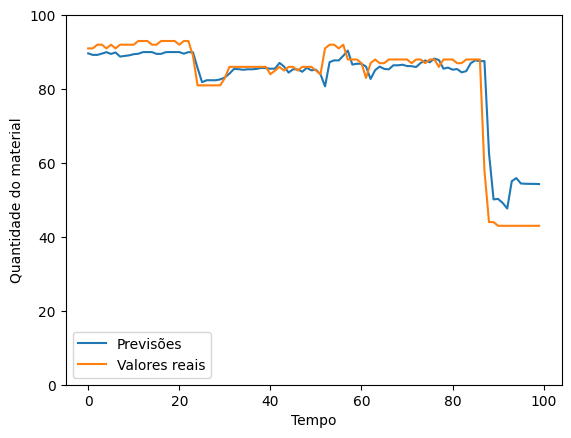

In [14]:
plot_predictions1(model, X_test, y_test)

45/45 [==============================] - 1s 17ms/step
MAE: 6.8826951321492915
RMSE: 10.2868649891801
SMAPE 4.9708998315483
Mape 8.704775406134813


,F2 Predictions,F2 Actuals
0,88.133247,86.0
1,87.057793,83.0
2,84.311310,87.0
3,87.254379,87.0
4,86.665947,87.0
...,...,...
95,89.836266,86.0
96,90.333893,86.0
97,90.339638,86.0
98,90.324539,86.0


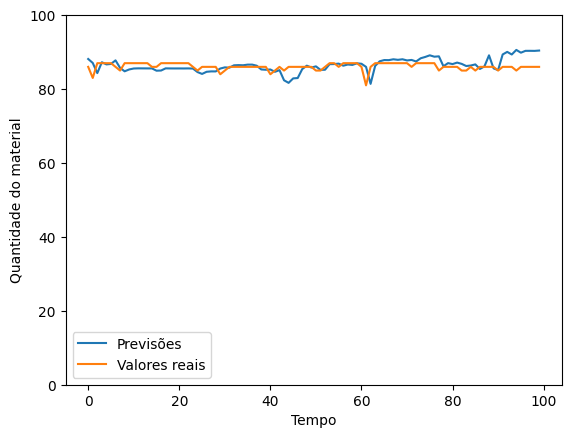

In [15]:
plot_predictions2(model, X_test, y_test)

45/45 [==============================] - 1s 15ms/step
MAE: 7.51765990021871
RMSE: 11.203204763410632
SMAPE 30.030546922189608
Mape inf


,F3 Predictions,F3 Actuals
0,74.546974,76.0
1,74.203094,71.0
2,70.485992,70.0
3,71.038414,70.0
4,70.730461,71.0
...,...,...
95,74.141479,73.0
96,74.690819,73.0
97,74.773003,73.0
98,74.801392,73.0


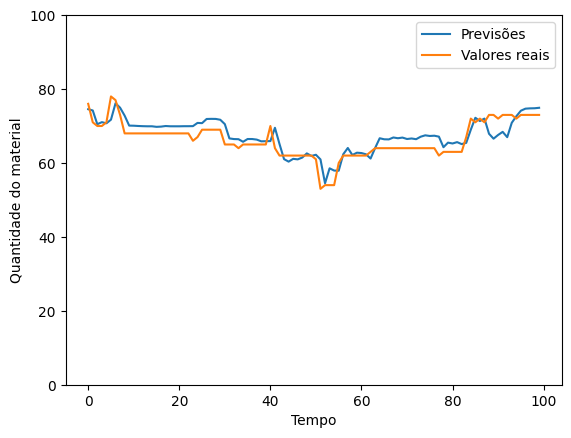

In [16]:
plot_predictions3(model, X_test, y_test)

45/45 [==============================] - 1s 23ms/step
MAE: 9.468680253990614
RMSE: 14.470542662180657
SMAPE 11.750927556962258
Mape inf


,F6 Predictions,F6 Actuals
0,81.592346,88.0
1,81.420120,88.0
2,81.329117,88.0
3,81.066170,87.0
4,81.323586,88.0
...,...,...
95,32.279575,18.0
96,32.263676,18.0
97,32.287594,18.0
98,32.285809,18.0


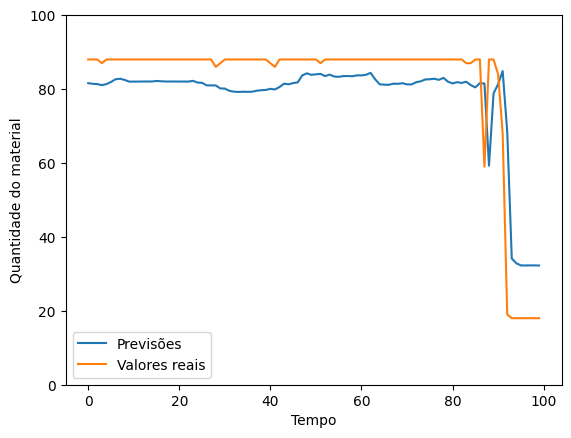

In [17]:
plot_predictions4(model, X_test, y_test)

45/45 [==============================] - 1s 27ms/step
MAE: 6.916951699636887
RMSE: 11.218988730445655
SMAPE 8.91638155293613
Mape inf


,F8 Predictions,F8 Actuals
0,2.458699,0.0
1,3.135836,0.0
2,1.605125,0.0
3,1.678656,0.0
4,2.591300,0.0
...,...,...
95,70.781097,68.0
96,71.250748,68.0
97,71.317993,68.0
98,71.337082,68.0


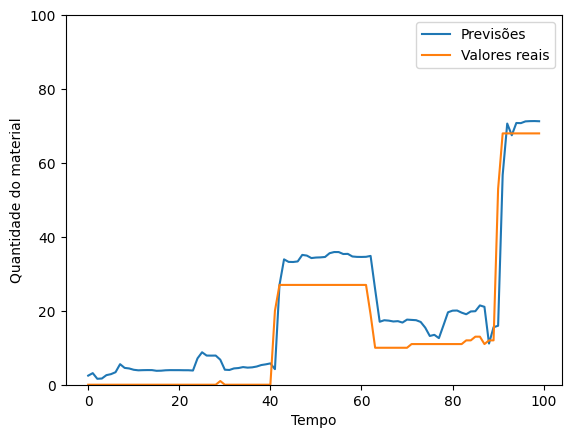

In [18]:
plot_predictions5(model, X_test, y_test)

45/45 [==============================] - 1s 17ms/step
MAE: 11.642643957688678
RMSE: 15.263738048422704
SMAPE 60.992396987427846
Mape inf


,F9 Predictions,F9 Actuals
0,31.259604,33.0
1,30.775070,33.0
2,31.097521,33.0
3,31.313883,25.0
4,27.132498,24.0
...,...,...
95,90.090614,89.0
96,89.971092,89.0
97,90.022446,89.0
98,90.030579,89.0


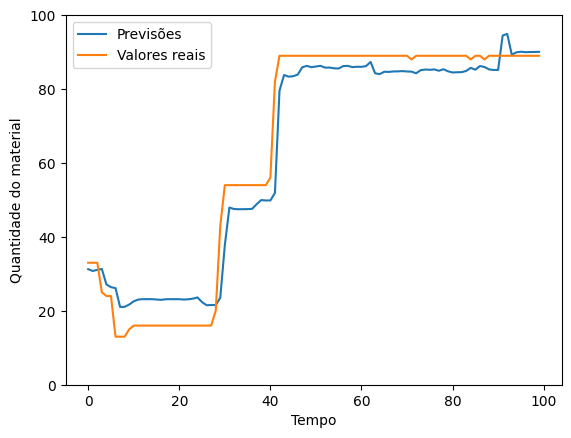

In [19]:
plot_predictions6(model, X_test, y_test)

45/45 [==============================] - 1s 16ms/step
MAE: 4.911828964092205
RMSE: 10.653086172975348
SMAPE 62.02250317000206
Mape inf


,F10 Predictions,F10 Actuals
0,23.380060,15.0
1,19.420782,18.0
2,21.397015,21.0
3,23.074282,21.0
4,22.352715,21.0
...,...,...
95,19.692774,18.0
96,19.003805,18.0
97,19.118248,18.0
98,19.143351,19.0


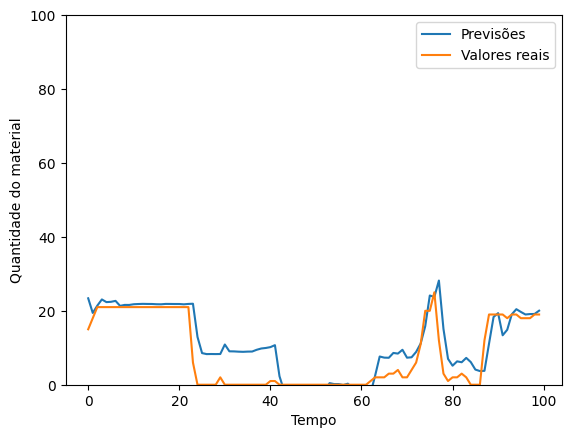

In [20]:
plot_predictions7(model, X_test, y_test)

45/45 [==============================] - 1s 16ms/step
MAE: 12.386120197635107
RMSE: 15.464815696376176
SMAPE 7.450711511901774
Mape 13.446189376480413


,F13 Predictions,F13 Actuals
0,90.718071,96.0
1,90.101807,96.0
2,90.595284,96.0
3,90.185387,96.0
4,90.579391,96.0
...,...,...
95,91.627556,96.0
96,91.499580,96.0
97,91.528564,96.0
98,91.504440,96.0


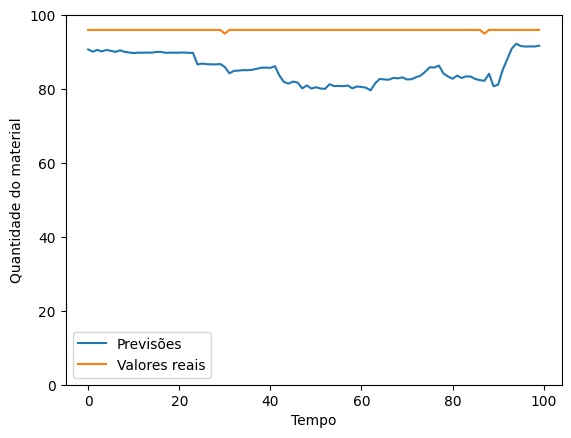

In [21]:
plot_predictions8(model, X_test, y_test)

45/45 [==============================] - 1s 16ms/step
MAE: 6.955416535456863
RMSE: 9.896714969416667
SMAPE 4.432090394249329
Mape 8.514063985765166


,F14 Predictions,F14 Actuals
0,94.648697,90.0
1,94.910263,90.0
2,94.405869,90.0
3,93.624985,90.0
4,94.314911,90.0
...,...,...
95,101.713722,93.0
96,101.772949,93.0
97,101.790115,93.0
98,101.765900,93.0


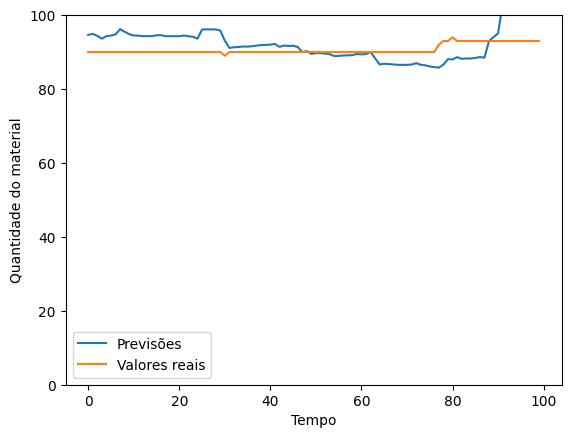

In [22]:
plot_predictions9(model, X_test, y_test)

45/45 [==============================] - 1s 15ms/step
MAE: 4.171946042683632
RMSE: 7.313767878462232
SMAPE 2.9668519062372023
MAPE 4.931739303353851


,F15 Predictions,F15 Actuals
0,93.505257,94.0
1,93.598427,94.0
2,94.247833,94.0
3,93.855606,94.0
4,94.244789,94.0
...,...,...
95,92.510399,94.0
96,92.413002,94.0
97,92.467331,94.0
98,92.488106,94.0


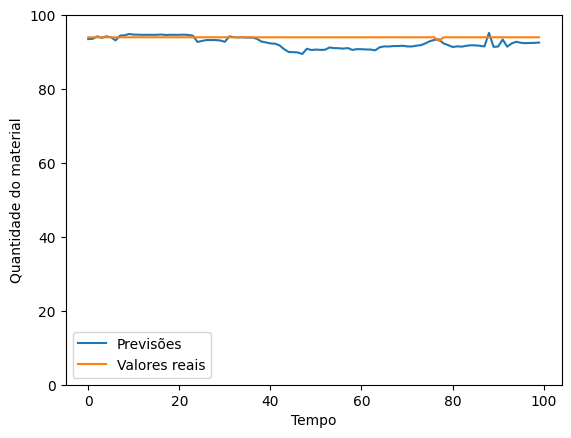

In [23]:
plot_predictions10(model, X_test, y_test)

45/45 [==============================] - 1s 16ms/step
MAE: 6.953342568554898
RMSE: 11.922730193354365
SMAPE 9.542224282646435
Mape inf


,F16 Predictions,F16 Actuals
0,89.541328,91.0
1,88.895103,91.0
2,90.347618,91.0
3,90.240417,91.0
4,89.922264,91.0
...,...,...
95,86.553391,90.0
96,86.410103,90.0
97,86.457703,90.0
98,86.462791,90.0


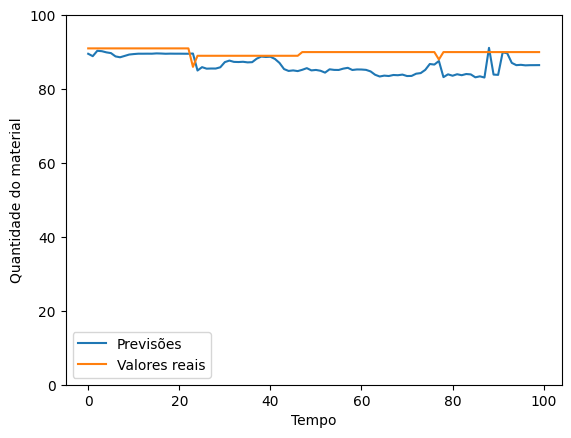

In [24]:
plot_predictions11(model, X_test, y_test)

45/45 [==============================] - 1s 15ms/step
MAE: 4.894419330215588
RMSE: 10.969195929166018
SMAPE 7.874611592328011
Mape inf


,F17 Predictions,F17 Actuals
0,91.643150,97.0
1,92.153763,97.0
2,93.196655,97.0
3,92.242249,97.0
4,92.591614,97.0
...,...,...
95,93.574669,95.0
96,93.582436,95.0
97,93.632866,95.0
98,93.652000,95.0


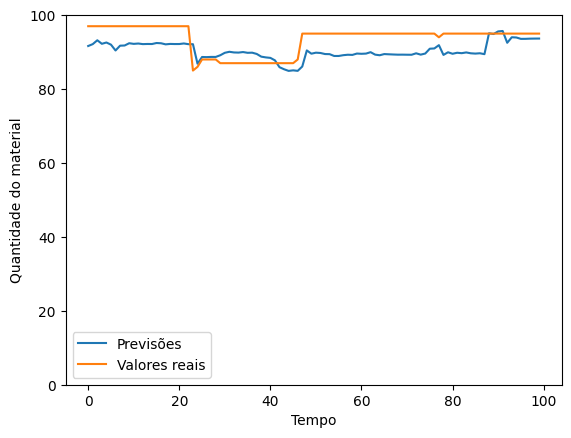

In [25]:
plot_predictions12(model, X_test, y_test)

45/45 [==============================] - 1s 20ms/step
MAE: 7.038463108294101
RMSE: 13.604738465281685
SMAPE 4.618449538867828
Mape 9.301789139739997


,F18 Predictions,F18 Actuals
0,89.616478,98.0
1,89.870117,98.0
2,89.982872,98.0
3,89.554848,98.0
4,90.112633,98.0
...,...,...
95,98.751991,88.0
96,98.792351,88.0
97,98.852348,88.0
98,98.872772,88.0


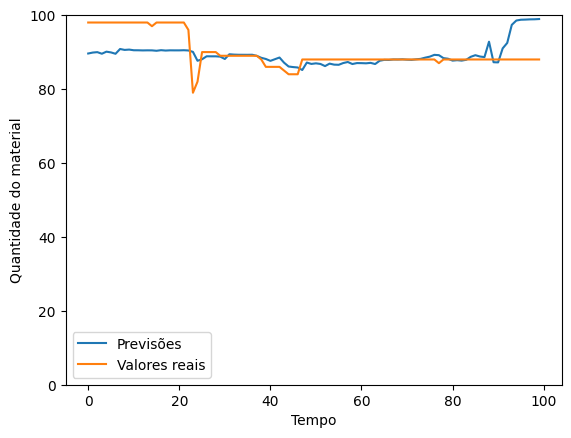

In [26]:
plot_predictions13(model, X_test, y_test)